In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/feb_16-20.csv')


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(20552, 7)


,date,id,text,hashtags,retweet_count,location,cleaned
0,2020-02-20,1230295556401975296,SBS Inkigayo Super Concert in Daegu is officia...,[],1248.0,"{'country_code': 'in', 'state': 'Rajasthan', ...",sbs inkigayo super concert daegu officially po...
1,2020-02-20,1230318654853500929,We are in 21st century nw. We have progressed ...,['coronavirus'],1.0,{'country_code': 'in'},st century nw progressed leaps bounds whn look...
2,2020-02-20,1230318716262506499,BREAKING: Reports of coronavirus cases in Iran,[],2.0,"{'country_code': 'in', 'state': 'Odisha', 'co...",breaking reports coronavirus cases iran
3,2020-02-20,1230320326174744578,#coronavirus sensitive subject @SandiipSikcand...,"['coronavirus', 'KahaanHumKahaanTum', 'Justice...",3.0,{'country_code': 'in'},coronavirus sensitive subject please handle ca...
4,2020-02-20,1230320491254120450,"Miffed Over Coronavirus Op-Ed, China Expels 3 ...",[],3.0,{'country_code': 'in'},miffed coronavirus op ed china expels wall str...


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned
20547,2020-02-20,1230360132103503872,#Visakhapatnam is home to the #Parawada #pharm...,"['Visakhapatnam', 'Parawada', 'pharma', 'IGES'...",1.0,{'country_code': 'in'},visakhapatnam home parawada pharma hub iges an...
20548,2020-02-20,1230353439575535616,my leftist ex roommate who labelled me as a br...,[],2.0,{'country_code': 'in'},leftist ex roommate labelled brahminical sangh...
20549,2020-02-20,1230375411583897600,Two deaths reported from Japan cruise ship.🥺\n...,"['COVID2019', 'coronavirusindia']",0.0,{'country_code': 'in'},two deaths reported japan cruise ship covid co...
20550,2020-02-20,1230421767664963584,I hopeeeeeee you cancel bp's showwwww there pl...,[],0.0,"{'country_code': 'in', 'state': 'Andhra Prade...",hopeeeeeee cancel bp showwwww please
20551,2020-02-20,1230395532406874112,Request from Singapore Fan 🙏 itna tou #Coronav...,"['Coronavirus', 'SidNaazShowInDemand', 'FansDe...",13.0,{'country_code': 'in'},request singapore fan itna tou coronavirus liy...


In [ ]:
print(df.shape)
df.isnull().sum()

(20552, 7)


date             0
id               0
text             0
hashtags         0
retweet_count    0
location         0
cleaned          0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    sbs inkigayo super concert daegu officially po...
1    st century nw progressed leaps bounds whn look...
2              breaking reports coronavirus cases iran
3    coronavirus sensitive subject please handle ca...
4    miffed coronavirus op ed china expels wall str...
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

20552


'sbs inkigayo super concert daegu officially postponed due ongoing spread coronavirus details event announced future keeping news new cases confirmed korea yesterday coming daegu'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 5.411919593811035 secs.


In [ ]:
t_clean[0]

['sb',
 'inkigayo',
 'super',
 'concert',
 'daegu',
 'officially',
 'postpone',
 'due',
 'ongoing',
 'spread',
 'coronavirus',
 'detail',
 'event',
 'announce',
 'future',
 'keep',
 'news',
 'new',
 'case',
 'confirm',
 'korea',
 'yesterday',
 'come',
 'daegu']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

sb


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

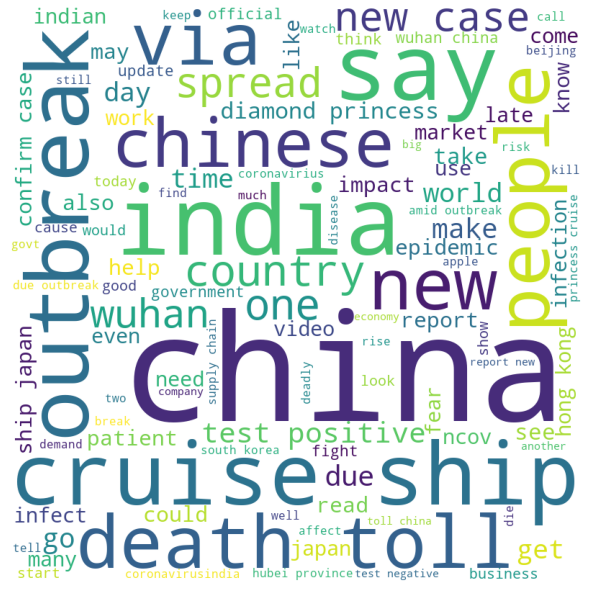

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['sb inkigayo super concert daegu officially postpone due ongoing spread coronavirus detail event announce future keep news new case confirm korea yesterday come daegu',
 'st century nw progress leaps bound whn look back century virus invisible replicates inside live cell organism create havoc world many thing beyond human stay ground coronavirus',
 'break report coronavirus case iran',
 'coronavirus sensitive subject please handle care hope writer homework really well kahaanhumkahaantum justiceforkhkt',
 'miffed coronavirus op ed china expels wall street journal correspondent']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['aboard diamond',
 'aboard diamond princess',
 'accurate information',
 'across china',
 'across country',
 'across globe',
 'across world',
 'ai iot',
 'air force',
 'air india',
 'amb india',
 'ambassador sun',
 'ambassador sun weidong',
 'american cruise',
 'american cruise ship',
 'american passenger',
 'american woman',
 'american woman cruise',
 'amid fear',
 'amid outbreak',
 'amid scare',
 'announce breakthrough',
 'announce breakthrough atomic',
 'announce measure',
 'announces drop',
 'announces drop new',
 'another people',
 'apple iphone',
 'apple miss',
 'apple revenue',
 'apple say',
 'apple warn',
 'apple warn hurt',
 'apple warns',
 'army camp',
 'around world',
 'assess impact',
 'assess impact outbreak',
 'atomic map',
 'atomic scale',
 'auto show',
 'back china',
 'bad news',
 'ban chinese',
 'battle outbreak',
 'bbc news',
 'begin leave',
 'best way',
 'bible bible',
 'bible bible lyov',
 'bible lyov',
 'bible lyov prove',
 'bigdata ai',
 'bill gate',
 'billion dol

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:medical supply,report new,outbreak china,india send,south korea,first death,report new case,supply china,medical supply china,send medical\nTopic 1:test positive,cruise ship,live update,quarantine cruise,quarantine cruise ship,chinese government,health commission,case report,two indian,new post\nTopic 2:coronavirusjapan coronavirusgermany,coronavirusgermany coronaviruschina,coronaviruscanada coronavirusfrance,coronavirusjapan coronavirusgermany coronaviruschina,coronavirususa coronaviruscanada coronavirusfrance,coronavirususa coronaviruscanada,coronavirusitalia coronavirususa,coronavirusitalia coronavirususa coronaviruscanada,realtime map,coronavirusgermany coronaviruschina coronavirusitalia\nTopic 3:quarantine facility,itbp quarantine,bring back,official say,people infect,apple warn,health official,itbp quarantine facility,people china,wuhan china\nTopic 4:death toll,due outbreak,china death,toll rise,china death toll,death toll rise,mainland china,time india,hong kong,news c

In [ ]:
lda.perplexity(tf)

476.5398820638331

In [ ]:
f=open('lda_feb_16-20.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_feb_16-20.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_feb_16-20.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_feb_16-20.pk')
shutil.move("topics_feb_16-20.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_feb_16-20.txt')